In [1]:
# Importing libraries

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Extracting coordinates of face

def face_extract(img): 
    import cv2

    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    face = face_classifier.detectMultiScale(img,1.3,5)

    if face is ():
        return "Not found"

    else:
        return face

In [3]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({"swish_activation": swish_activation})

In [4]:
# Loading saved model and weights

json_file = open('cnn_model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cnn_model/model.h5")

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Reading image for model input

img = cv2.imread('images/jennifer.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_extract(img) # calling face_extract method defined above
faces # Coordinates of all faces detected

array([[299,  94, 179, 179]], dtype=int32)

In [6]:
# Extracting coordinates of closest face

max = faces[0,2]+faces[0,3]
face = faces[0,:]
for x,y,w,h in faces:
    if(h+w)>max:
        face = np.array([x,y,w,h])

face = face.reshape(1,4)

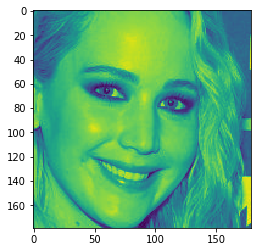

In [7]:
# Cropping face from image

for x,y,w,h in face:
    img_cropped = img[y:y+h, x:x+w]
    plt.imshow(img_cropped)

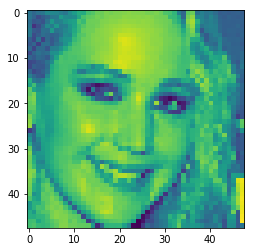

In [8]:
# Resizing image to prepare input for trained model

img_resized = cv2.resize(img_cropped,(48,48))
plt.imshow(img_resized)

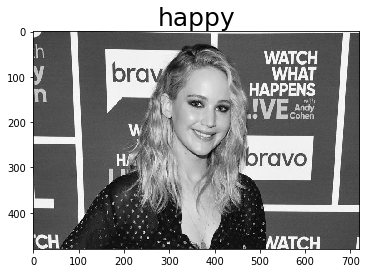

In [9]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral') # Types of labels

# Reshaping input
img_resized = img_resized/255
input = np.reshape(img_resized,(1,1,48,48))
prediction = loaded_model.predict(input)

# Printing image
plt.imshow(img, cmap = 'gray')
plt.savefig('amber_expression.png')
plt.title(objects[np.argmax(prediction)],fontsize=25) # Printing prediction as title of image
plt.show()